In [1]:
import numpy as np
import matplotlib.pyplot as plt

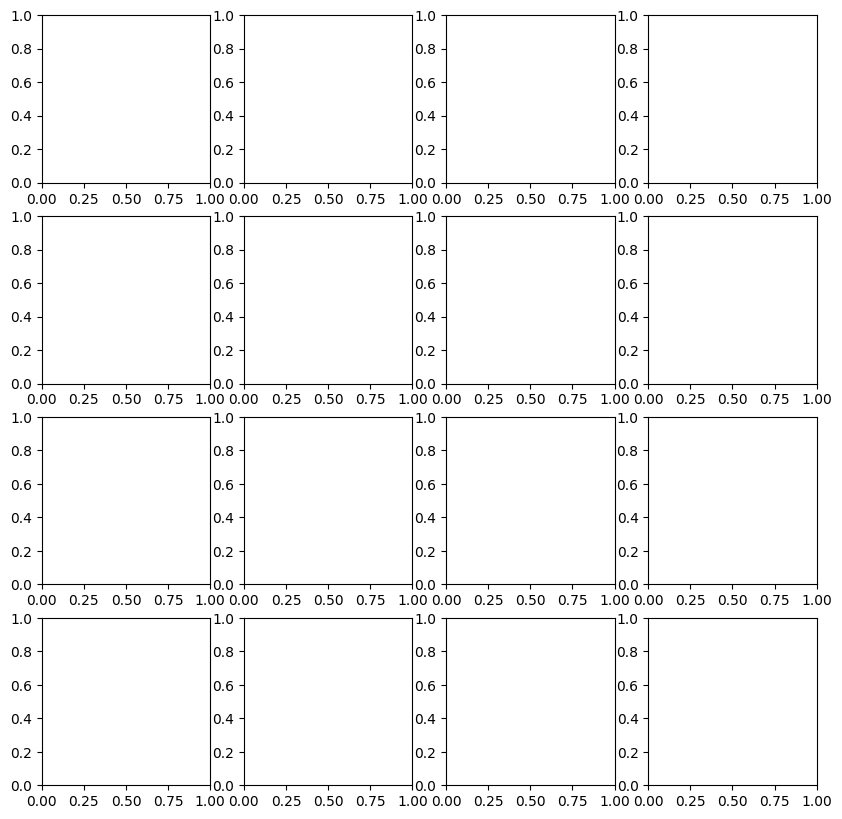

In [2]:
m,n=4,4
fig,axes=plt.subplots(figsize=(10,10),nrows=m,ncols=n)

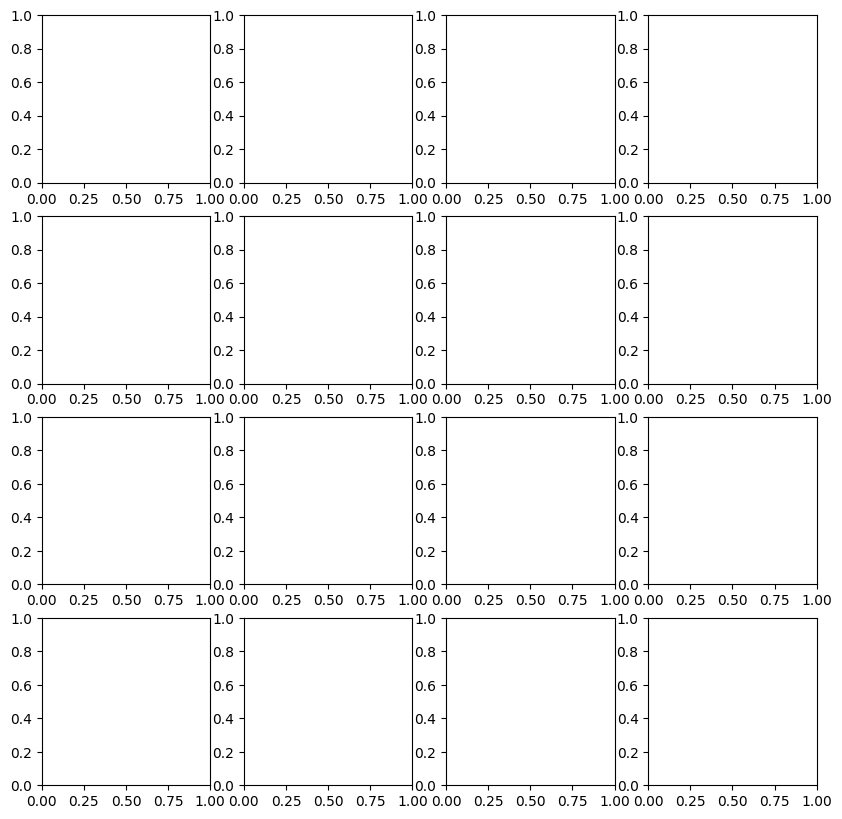

In [3]:
fig

In [4]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

In [5]:
axes.flatten()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

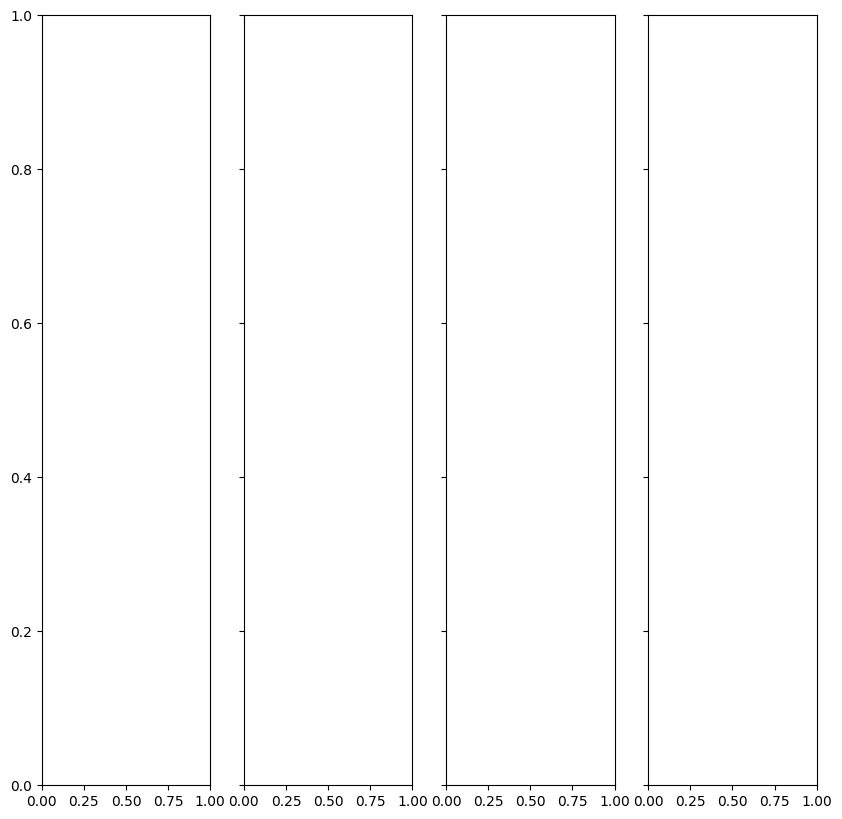

In [6]:
m,n=1,4
fig,axes=plt.subplots(figsize=(10,10),nrows=m,ncols=n,sharex=True,sharey=True)

In [7]:
faces = [np.array([1,0,0,1]),
         np.array([0.9,0.1,0.2,0.8]),
         np.array([0.9,0.2,0.1,0.8]),
         np.array([0.8,0.1,0.2,0.9]),
         np.array([0.8,0.2,0.1,0.9])]

(<Figure size 1000x1000 with 4 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       dtype=object))

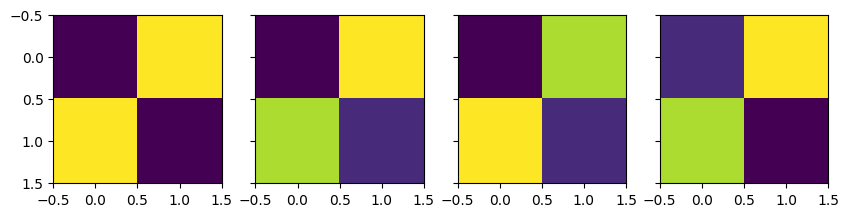

In [8]:
m,n=1,4
fig,axes=plt.subplots(figsize=(10,10),nrows=m,ncols=n,sharex=True,sharey=True)
for ax,img in zip(axes.flatten(),faces):
    im=ax.imshow(1-img.reshape((2,2)))
fig,axes

(<Figure size 1000x1000 with 5 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>], dtype=object))

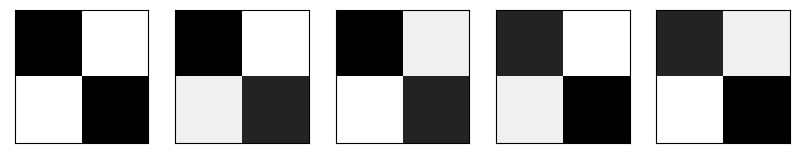

In [9]:
m,n=1,5
fig,axes=plt.subplots(figsize=(10,10),nrows=m,ncols=n,sharex=True,sharey=True)
for ax,img in zip(axes.flatten(),faces):
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    im=ax.imshow(1-img.reshape((2,2)),cmap='Greys_r')
fig,axes

In [10]:
def view_samples(samples, m, n):
    fig, axes = plt.subplots(figsize=(10, 10), nrows=m, ncols=n, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples):
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(1-img.reshape((2,2)), cmap='Greys_r')  
    return fig, axes

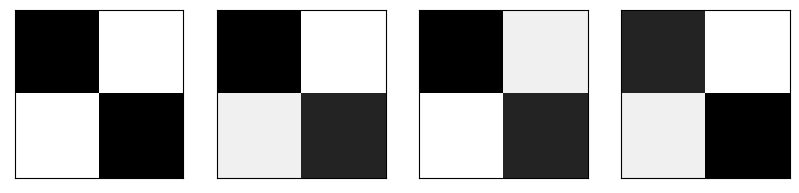

In [11]:
_ = view_samples(faces, 1, 4)

In [12]:
noise=[np.random.randn(2,2) for i in range(20)]

In [13]:
def generate_random_image():
    return [np.random.random(), np.random.random(), np.random.random(), np.random.random()]

In [14]:
noise[:5]

[array([[ 0.54202555, -0.46906841],
        [-2.37025792,  0.37439446]]),
 array([[ 0.40262963,  0.17521545],
        [-0.9029062 ,  1.24024694]]),
 array([[-0.71711301,  1.38800792],
        [ 0.02940515,  0.76349484]]),
 array([[ 0.28879725,  1.27777164],
        [-0.75728941, -1.6396415 ]]),
 array([[-0.14101996,  0.97891027],
        [ 0.82568584,  1.25896178]])]

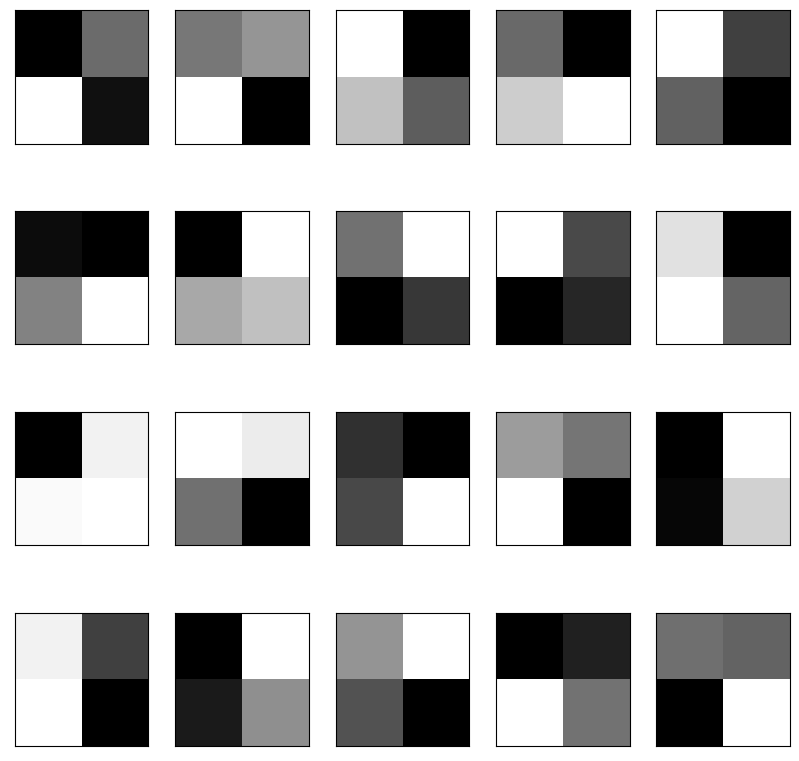

In [15]:
_ = view_samples(noise, 4,5)

In [22]:
def sigmoid(x):
    return np.exp(x)/(1.0+np.exp(x))

In [30]:
class Discriminator:
    def __init__(self):
        self.weights=np.array([np.random.normal() for i in range(4)])
        self.bias=np.random.normal()

    def forward(self,x):
        return sigmoid(np.dot(self.weights,x)+self.bias)
    
    def error_from_image(self,image):
        pred=self.forward(image)
        return -np.log(pred)
    
    def derivatives_from_image(self,image):
        pred=self.forward(image)
        derivatives_weights = -image * (1-pred)
        derivative_bias = -(1-pred)
        return derivatives_weights, derivative_bias
    
    def update_from_image(self, x):
        ders = self.derivatives_from_image(x)
        self.weights -= learning_rate * ders[0]
        self.bias -= learning_rate * ders[1]

    def error_from_noise(self, noise):
        pred = self.forward(noise)
        return -np.log(1-pred)
    
    def derivatives_from_noise(self, noise):
        prediction = self.forward(noise)
        derivatives_weights = noise * prediction
        derivative_bias = prediction
        return derivatives_weights, derivative_bias
    
    def update_from_noise(self, noise):
        ders = self.derivatives_from_noise(noise)
        self.weights -= learning_rate * ders[0]
        self.bias -= learning_rate * ders[1]

In [31]:
class Generator():
    def __init__(self):
        self.weights = np.array([np.random.normal() for i in range(4)])
        self.biases = np.array([np.random.normal() for i in range(4)])

    def forward(self, z):
        return sigmoid(z * self.weights + self.biases)
    
    def error(self, z, discriminator):
        x = self.forward(z)
        y = discriminator.forward(x)
        return -np.log(y)
    
    def derivatives(self, z, discriminator):
        discriminator_weights = discriminator.weights
        discriminator_bias = discriminator.bias
        x = self.forward(z)
        y = discriminator.forward(x)
        factor = -(1-y) * discriminator_weights * x *(1-x)
        derivatives_weights = factor * z
        derivative_bias = factor
        return derivatives_weights, derivative_bias
    
    def update(self, z, discriminator):
        error_before = self.error(z, discriminator)
        ders = self.derivatives(z, discriminator)
        self.weights -= learning_rate * ders[0]
        self.biases -= learning_rate * ders[1]
        error_after = self.error(z, discriminator)

In [32]:
np.random.seed(42)

learning_rate = 0.01
epochs = 1000

D = Discriminator()
G = Generator()

errors_discriminator = []
errors_generator = []

for epoch in range(epochs):
    
    for face in faces:

        D.update_from_image(face)

        z = np.random.rand()

        errors_discriminator.append(sum(D.error_from_image(face) + D.error_from_noise(z)))

        errors_generator.append(G.error(z, D))

        noise = G.forward(z)

        D.update_from_noise(noise)
    
        G.update(z, D)

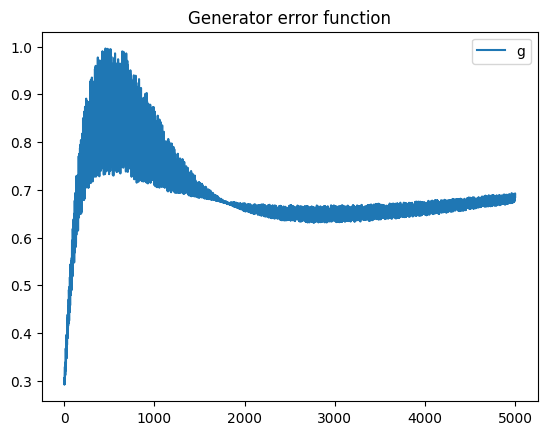

Text(0.5, 1.0, 'Discriminator error function')

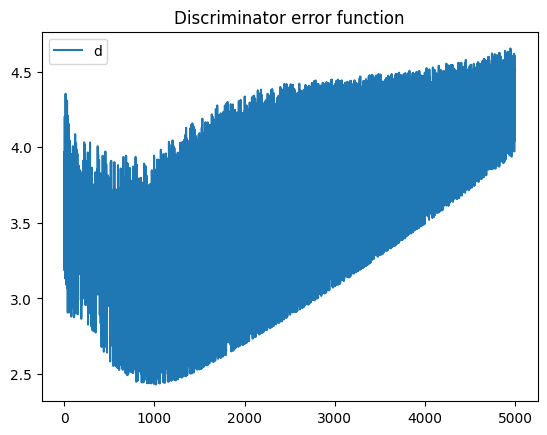

In [33]:
import matplotlib.pyplot as plt
plt.plot(errors_generator)
plt.title("Generator error function")
plt.legend("gen")
plt.show()
plt.plot(errors_discriminator)
plt.legend('disc')
plt.title("Discriminator error function")

[0.94688171 0.03401213 0.04080795 0.96308679]
[0.95653992 0.03437852 0.03579494 0.97063836]
[0.95056667 0.03414339 0.03893305 0.96599501]
[0.94228203 0.03386046 0.04309146 0.95941292]


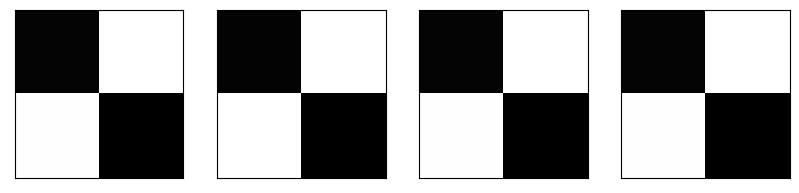

In [35]:
generated_images = []
for i in range(4):
    z = np.random.random()
    generated_image = G.forward(z)
    generated_images.append(generated_image)
_ = view_samples(generated_images, 1, 4)
for i in generated_images:
    print(i)

In [36]:
print("Generator weights", G.weights)
print("Generator biases", G.biases)

Generator weights [ 0.70702123  0.03720449 -0.45703394  0.79375751]
Generator biases [ 2.48490157 -3.36725912 -2.90139211  2.8172726 ]


In [37]:
print("Discriminator weights", D.weights)
print("Discriminator bias", D.bias)

Discriminator weights [ 0.60175083 -0.29127513 -0.40093314  0.37759987]
Discriminator bias -0.8955103005797738


Experiments

In [23]:
np.array([np.random.normal() for i in range(4)]),np.random.normal()

(array([-0.2955537 ,  2.2318546 ,  1.68945211, -0.13653105]),
 1.6702541900853791)

In [27]:
a=np.dot(faces[1],np.array([np.random.normal() for i in range(4)]))+np.random.normal()
a

1.154529422797867

In [29]:
pred=sigmoid(a)
pred

0.7603372617941069

In [30]:
-np.log(pred)

0.2739931786179961

In [31]:
image=faces[1]
derivatives_weights = -image * (1-pred)
derivative_bias = -(1-pred)
derivatives_weights,derivative_bias

(array([-0.21569646, -0.02396627, -0.04793255, -0.19173019]),
 -0.23966273820589312)